导入需要的python包

In [307]:
# 读取所需的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")

读入数据

In [308]:
# 读取数据
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# 查看信息————后面的都是
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [309]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [310]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [311]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [312]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


缺失数据研究

In [313]:
# 看看Age的缺失率大概是多少
print('数据"Age"的缺失率：%.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))
# 还可以

数据"Age"的缺失率：19.87%


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

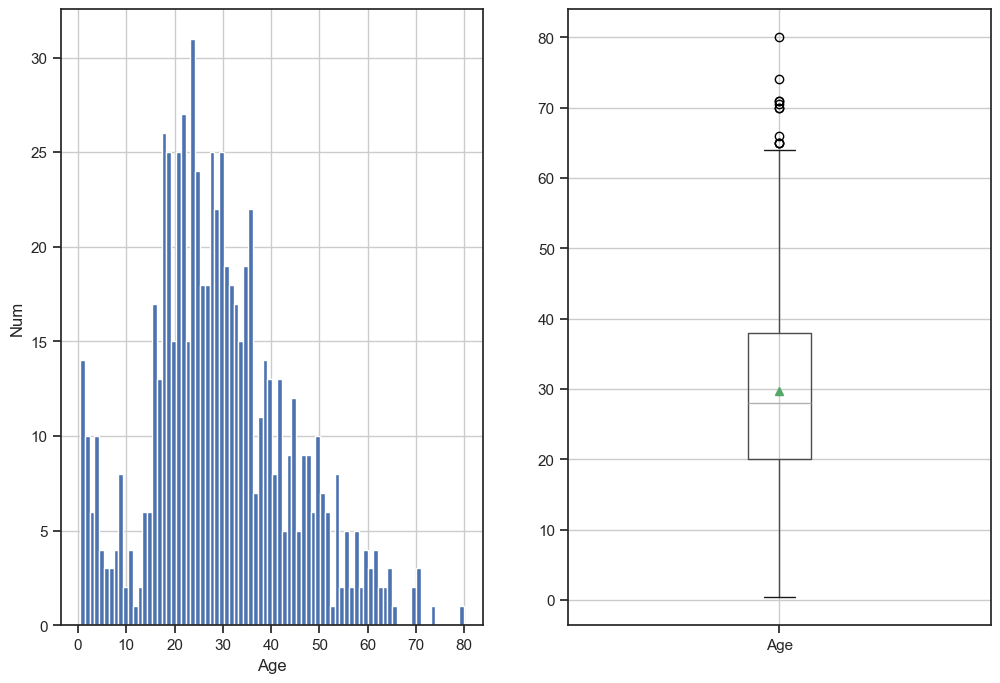

In [314]:
# 可以画出关于notnull的Age字段的直方图和箱线图
sns.set()
sns.set_style('ticks')

# 缺失值处理：年龄Age字段
train_age=train[train['Age'].notnull()]

# 年龄数据的分布情况
plt.figure(figsize=(12,8))

plt.subplot(121)
train_age['Age'].hist(bins=80)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
train_age.boxplot(column='Age',showfliers=True,showmeans=True)

train_age['Age'].describe()

In [315]:
# 我们可以看看'Cabin'字段的缺失率
print('数据"Cabin"的缺失率：%.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))
# 还是直接删了吧

数据"Cabin"的缺失率：77.10%


In [316]:
# 继续看一看'Embarked'的缺失率
print('数据"Embarked"的缺失率：%.2f%%' %((train['Embarked'].isnull().sum()/train.shape[0])*100))
# 看起来很小，找常值补上就好

数据"Embarked"的缺失率：0.22%


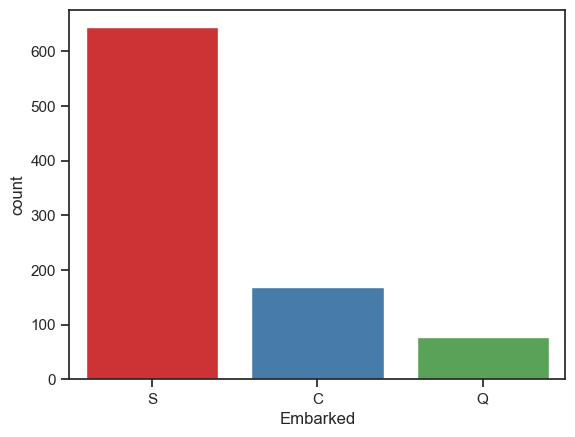

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [317]:
# 看一看Embarked的分布
sns.countplot(x='Embarked',data=train,palette='Set1')
plt.show()
train['Embarked'].value_counts()
# 大部分是S

缺失值处理


In [318]:
# 对缺失值处理
train['Age']=train['Age'].fillna(train['Age'].mean()) # 用平均值填充
train.drop(['Cabin'],axis=1,inplace=True) # 删去Cabin的那一列数据
train.Embarked = train.Embarked.fillna('S') # 用’S'填补缺失值
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


数据分析

<Axes: ylabel='count'>

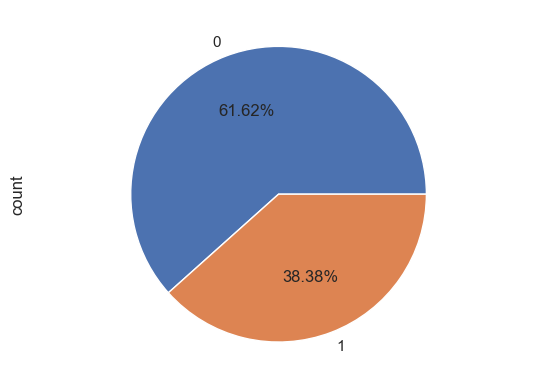

In [319]:
train_survived=train[train['Survived'].notnull()]

# 用seaborn绘制饼图，分析已知存活数据中的存活比例
sns.set_style('ticks') # 十字叉
plt.axis('equal')      # 行宽相同
train_survived['Survived'].value_counts().plot.pie(autopct='%1.2f%%')
# 大约有38.38%的人存活下来

女性存活率74.20%,男性存活率18.89%


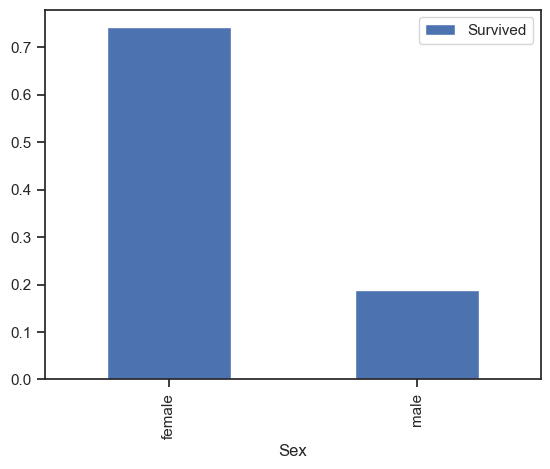

In [320]:
# 分析Sex
# 男性和女性存活情况
train[['Sex','Survived']].groupby('Sex').mean().plot.bar()

survive_sex=train.groupby(['Sex','Survived'])['Survived'].count()

print('女性存活率%.2f%%,男性存活率%.2f%%' %
     (survive_sex.loc['female',1]/survive_sex.loc['female'].sum()*100,
      survive_sex.loc['male',1]/survive_sex.loc['male'].sum()*100)
    )

Sex       female  male
Survived              
0             81   468
1            233   109


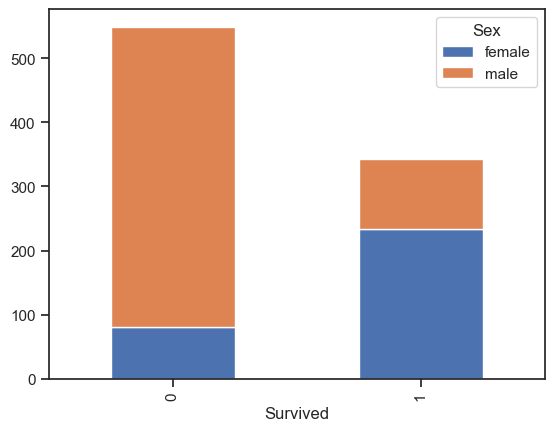

In [321]:
# 查看survived 与 Sex的关系
Survived_Sex = train['Sex'].groupby(train['Survived'])
print(Survived_Sex.value_counts().unstack())

Survived_Sex.value_counts().unstack().plot(kind = 'bar', stacked = True)
plt.show()
# 从数据结果可以看出，还是女士优先的

<Axes: xlabel='Age', ylabel='Survived'>

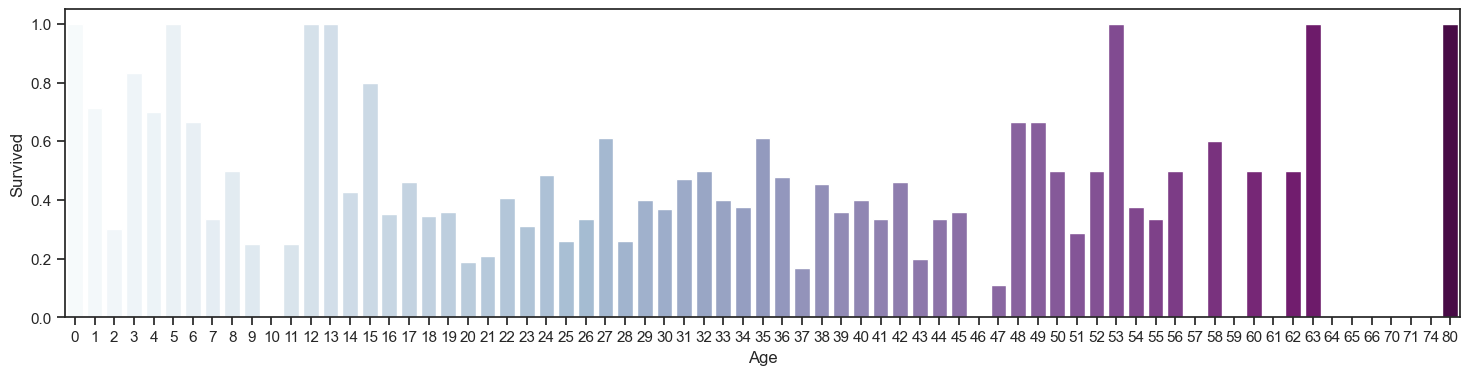

In [322]:
# 分析Age
plt.figure(figsize=(18,4))
train_age['Age']=train_age['Age'].astype(int)
average_age=train_age[['Age','Survived']].groupby('Age',as_index=False).mean()

sns.barplot(x='Age',y='Survived',data=average_age,palette='BuPu')
# 粗略的得出了Age与Survived的关系

<Axes: xlabel='family_size'>

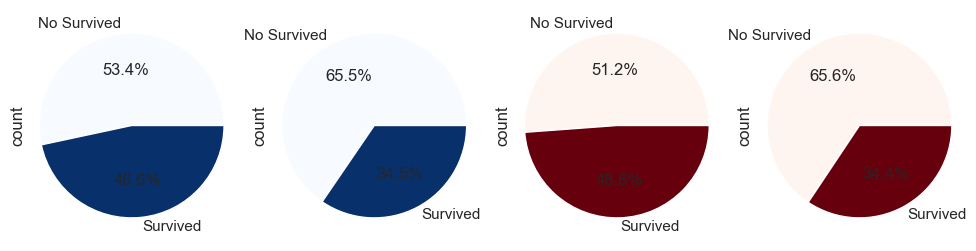

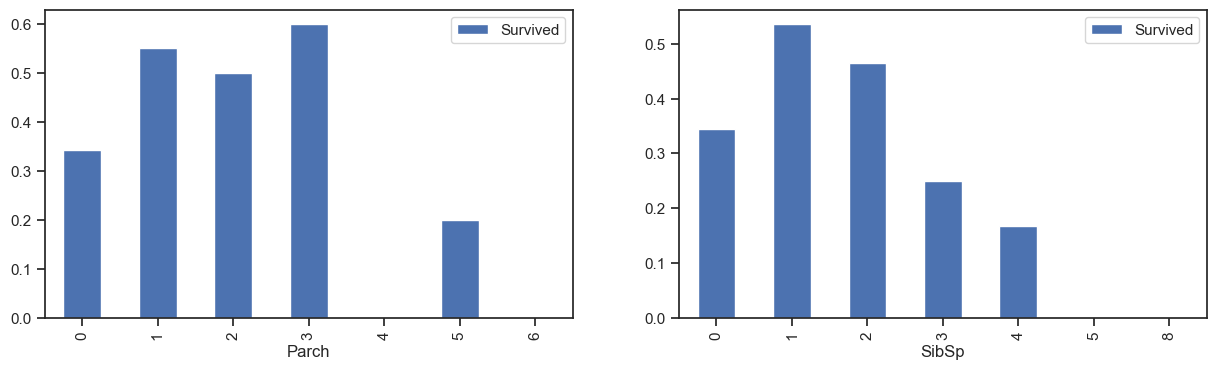

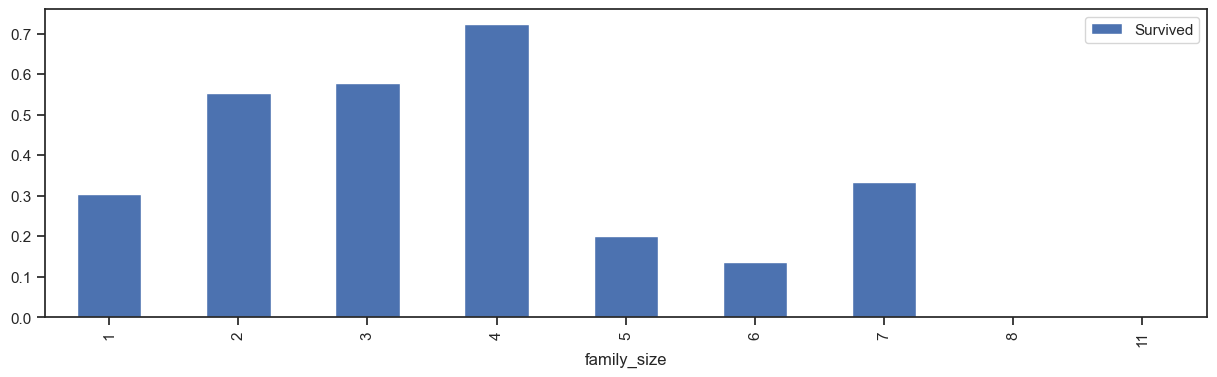

In [323]:
# 分析Sibsp和Parch
# 筛选出有无兄弟姐妹
sibsp_df = train[train['SibSp']!=0] # 有兄弟姐妹
no_sibsp_df = train[train['SibSp']==0] # 没有兄弟姐妹

# 筛选处有无父母子女
parch_df = train[train['Parch']!=0] # 有父母子女
no_parch_df = train[train['Parch']==0] # 没有父母

plt.figure(figsize=(12,3))
plt.subplot(141)
plt.axis('equal')
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct='%1.1f%%',colormap='Blues')

plt.subplot(142)
plt.axis('equal')
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct='%1.1f%%',colormap='Blues')


plt.subplot(143)
plt.axis('equal')
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct='%1.1f%%',colormap='Reds')

plt.subplot(144)
plt.axis('equal')
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct='%1.1f%%',colormap='Reds')
     

# 亲戚多少与是否存活有关吗？
fig,ax=plt.subplots(1,2,figsize=(15,4))
train[['Parch','Survived']].groupby('Parch').mean().plot.bar(ax=ax[0])
train[['SibSp','Survived']].groupby('SibSp').mean().plot.bar(ax=ax[1])

train['family_size']=train['Parch']+train['SibSp']+1
train[['family_size','Survived']].groupby('family_size').mean().plot.bar(figsize=(15,4))
# 从以上数据可以较为清楚的去分析兄弟姐妹还有父母与最后的survived的关系，由于兄弟姐妹和父母可以看为家庭成员，所以后来将这些加起来，画出一个直方图较为好的显示出数据

<Axes: xlabel='Pclass'>

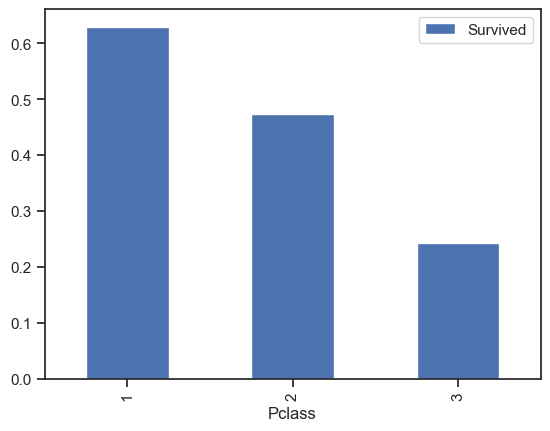

In [324]:
# 分析Pclass
train[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


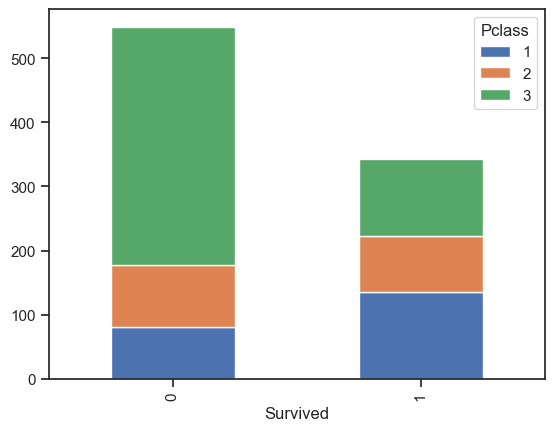

In [325]:
# 查看Survived 与 Pclass的关系
Survived_Pclass = train['Pclass'].groupby(train['Survived'])
print(Survived_Pclass.value_counts().unstack())

Survived_Pclass.value_counts().unstack().plot(kind = 'bar', stacked = True)
plt.show()
# 船舱等级越高的，存活率就越高

<Axes: >

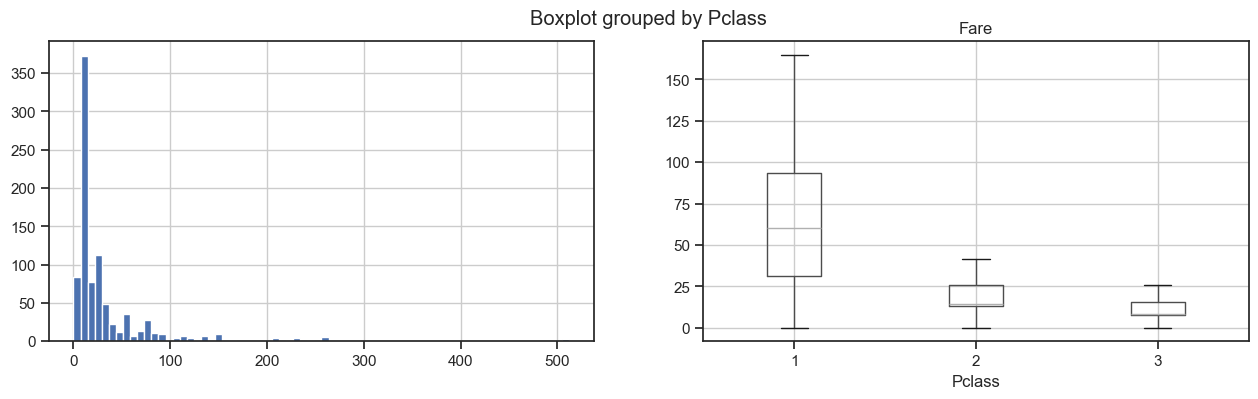

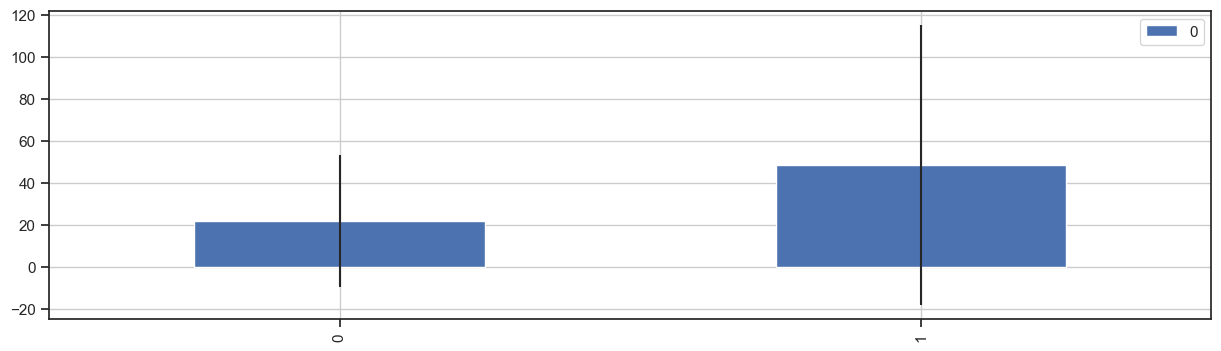

In [326]:
# 分析Fare
fig,ax=plt.subplots(1,2,figsize=(15,4))
train['Fare'].hist(bins=70,ax=ax[0])
train.boxplot(column='Fare',by='Pclass',showfliers=False,ax=ax[1])

fare_not_survived=train['Fare'][train['Survived']==0]
fare_survived=train['Fare'][train['Survived']==1]
# 筛选数据

average_fare=pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare=pd.DataFrame([fare_not_survived.std(),fare_survived.std()])

average_fare.plot(yerr=std_fare,kind='bar',figsize=(15,4),grid=True)
# 再看乘客费用与Pclass以及Survived的关系，可以看出来Pclass的等级是与Fare有关的，Pclass为1的Fare会比其他的高，最后survived也是有关的

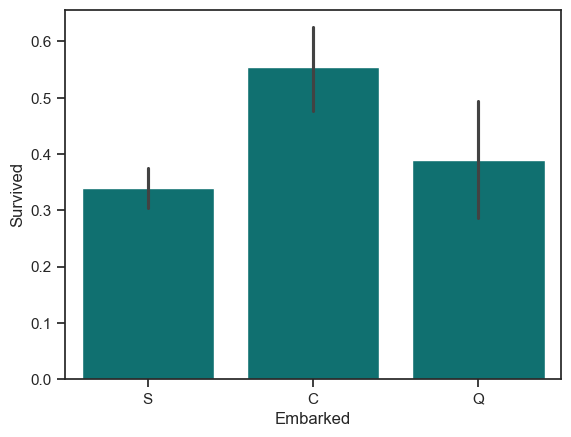

In [327]:
# 分析Embared
sns.barplot(x='Embarked', y='Survived', data=train, color="teal")
plt.show()
# 可以看出C入口的存活率是更高的

Text(0.5, 1.0, 'Sex and Age vs Survived')

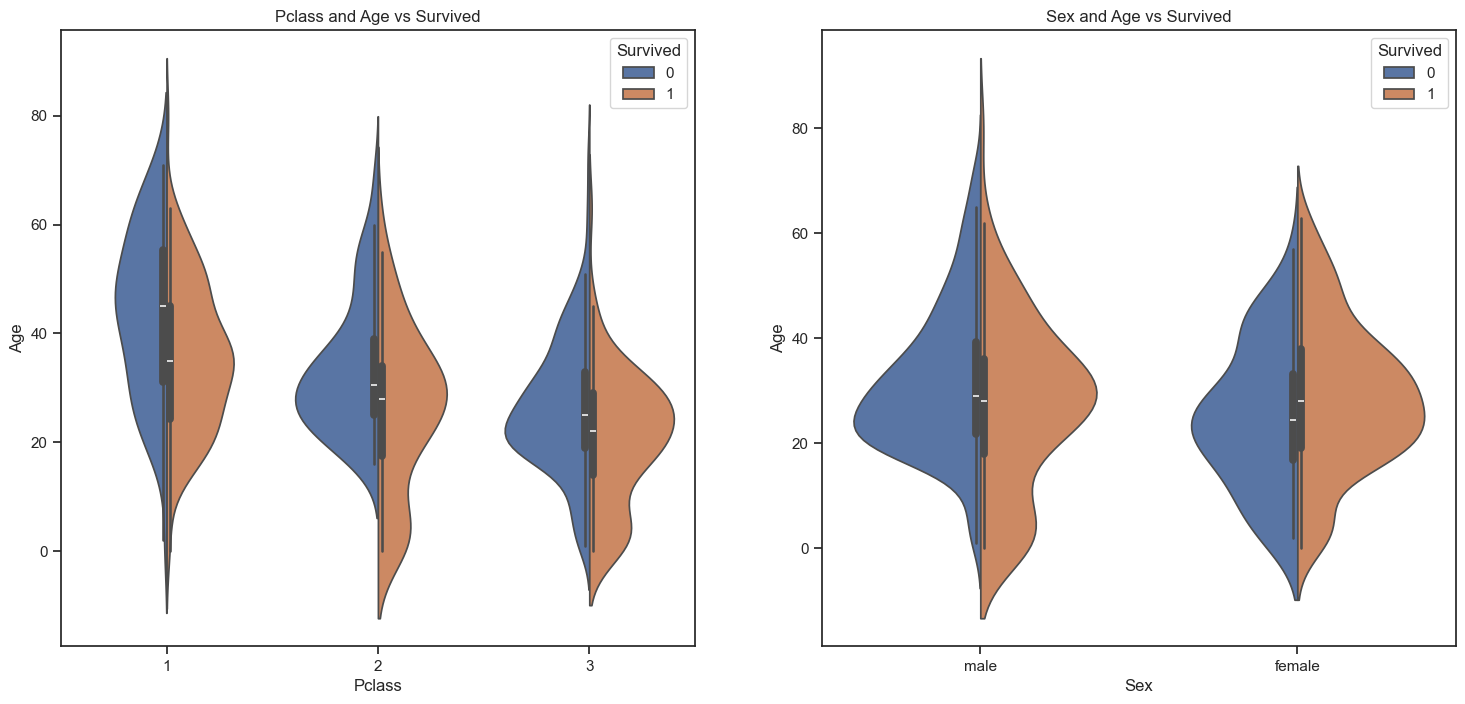

In [328]:
# 总体结合分析
fig,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot(x='Pclass',y='Age',hue='Survived',data=train_age,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')

sns.violinplot(x='Sex',y='Age',hue='Survived',data=train_age,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')

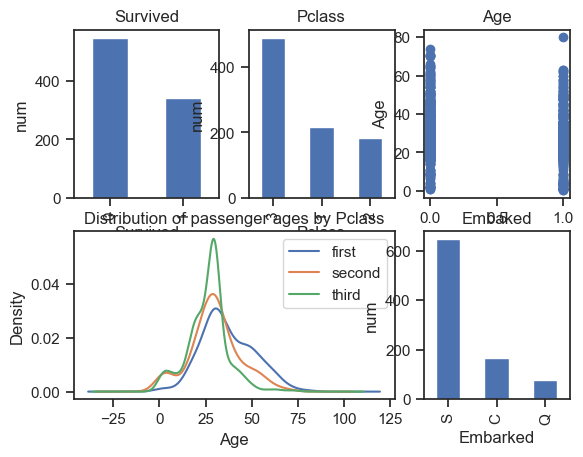

In [329]:
# 比较一下Sex和Age还有Pclass和Age的关系
fig=plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))
train.Survived.value_counts().plot(kind='bar')
plt.title('Survived')
plt.ylabel('num')

plt.subplot2grid((2,3),(0,1))
train.Pclass.value_counts().plot(kind='bar')
plt.title('Pclass')
plt.ylabel('num')

plt.subplot2grid((2,3),(0,2))
plt.scatter(train.Survived,train.Age)
plt.ylabel('Age')
plt.title('Age')

plt.subplot2grid((2,3),(1,0),colspan=2)
train.Age[train.Pclass == 1].plot(kind='kde')
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of passenger ages by Pclass')
plt.legend(('first','second','third'),loc='best')

plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind='bar')
plt.title('Embaked')
plt.ylabel('num')
plt.show()
# 这里较为好的表示出来各个关系，有个更直观的感受
# 从上面的各个数据可以总结一下，最后的survived的值
# 我们推测可能与Sex是密切相关的，可能在救援过程中，人们会对女性有所照顾。

# 和Fare和Pclass应该也是密切相关的，这是一个重要的特征，有钱人的存活率会更高，头等舱的存活率也会更高，而票价低的乘客存活率会低很多

# 同时，观察Embarked，我们可以看到C出口的存活率更高，这可能是因为C出口更加靠近舱门，所以救援速度就会更快

建立模型

In [330]:
# 为逻辑回归建模时，需要输入的特征都是数值型特征，所以在建立模型之前，我们要进行一些操作
# 为了方便模型的建立，首先是将train和test拼接在一起
dataset = train._append(test,sort=False) # 合并后的数据，方便一起清洗

编码数据处理

In [331]:
# 对Sex数据进行编码，男0女1
sexdict = {'male':0, 'female':1}
dataset.Sex = dataset.Sex.map(sexdict)

# 将Embarked, Cabin, Pclass进行one_hot编码
embarked2 = pd.get_dummies(dataset.Embarked, prefix = 'Embarked')
dataset = pd.concat([dataset,embarked2], axis = 1) # 将编码好的数据添加到原数据上
dataset.drop(['Embarked'], axis = 1, inplace=True) # 用完即删

pclass2 = pd.get_dummies(dataset.Pclass, prefix = 'Pclass')
dataset = pd.concat([dataset,pclass2], axis = 1) # 将编码好的数据添加到原数据上
dataset.drop(['Pclass'], axis = 1, inplace=True) # 用完即删

dataset

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,family_size,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.0,NaN,False,False,True,False,False,True
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2.0,NaN,True,False,False,True,False,False
2,3,1.0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1.0,NaN,False,False,True,False,False,True
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2.0,NaN,False,False,True,True,False,False
4,5,0.0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1.0,NaN,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,NaN,False,False,True,False,False,True
414,1306,NaN,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,NaN,C105,True,False,False,True,False,False
415,1307,NaN,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,NaN,False,False,True,False,False,True
416,1308,NaN,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,NaN,False,False,True,False,False,True


In [332]:
# 建立family_size特征：SibSp和Parch分别代表了兄弟姐妹和配偶数量，以及父母与子女数量。通过这两个数字，我们可以计算出该乘客的随行人数，作为一列新的特征
dataset['family']=dataset.SibSp+dataset.Parch+1
dataset

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,family_size,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,family
0,1,0.0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.0,NaN,False,False,True,False,False,True,2
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2.0,NaN,True,False,False,True,False,False,2
2,3,1.0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1.0,NaN,False,False,True,False,False,True,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2.0,NaN,False,False,True,True,False,False,2
4,5,0.0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1.0,NaN,False,False,True,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,NaN,False,False,True,False,False,True,1
414,1306,NaN,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,NaN,C105,True,False,False,True,False,False,1
415,1307,NaN,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,NaN,False,False,True,False,False,True,1
416,1308,NaN,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,NaN,False,False,True,False,False,True,1


In [333]:
# 去掉无关值：把没有帮助的列删除
dataset.drop(['Ticket'], axis = 1, inplace=True)
dataset.drop(['Name'], axis = 1, inplace=True)
dataset.drop(['Cabin'], axis = 1, inplace=True)
dataset.info()
dataset

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Sex          1309 non-null   int64  
 3   Age          1223 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1308 non-null   float64
 7   family_size  891 non-null    float64
 8   Embarked_C   1309 non-null   bool   
 9   Embarked_Q   1309 non-null   bool   
 10  Embarked_S   1309 non-null   bool   
 11  Pclass_1     1309 non-null   bool   
 12  Pclass_2     1309 non-null   bool   
 13  Pclass_3     1309 non-null   bool   
 14  family       1309 non-null   int64  
dtypes: bool(6), float64(4), int64(5)
memory usage: 109.9 KB


,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,family_size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,family
0,1,0.0,0,22.0,1,0,7.2500,2.0,False,False,True,False,False,True,2
1,2,1.0,1,38.0,1,0,71.2833,2.0,True,False,False,True,False,False,2
2,3,1.0,1,26.0,0,0,7.9250,1.0,False,False,True,False,False,True,1
3,4,1.0,1,35.0,1,0,53.1000,2.0,False,False,True,True,False,False,2
4,5,0.0,0,35.0,0,0,8.0500,1.0,False,False,True,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,0,NaN,0,0,8.0500,NaN,False,False,True,False,False,True,1
414,1306,NaN,1,39.0,0,0,108.9000,NaN,True,False,False,True,False,False,1
415,1307,NaN,0,38.5,0,0,7.2500,NaN,False,False,True,False,False,True,1
416,1308,NaN,0,NaN,0,0,8.0500,NaN,False,False,True,False,False,True,1


In [334]:
# 用seaborn的库画出维度间的相关性热度图
plt.figure(figsize=(14,12))
sns.heatmap(dataset.corr(),annot = True)
plt.show()
# 热力图显示，生存与否，与Sex, Fare, Embarked_C, Pclass_1相关度都比较高，使用这些维度进行预测

训练集与测试集

In [ ]:
x_train = dataset.iloc[0:891, :]
y_train = x_train.Survived
x_train.drop(['Survived'], axis=1, inplace =True)
train = dataset[0:891]

x_test = dataset.iloc[891:, :]
x_test.drop(['Survived'], axis=1, inplace =True)
test = dataset.iloc[891:]

y_test = pd.read_csv('gender_submission.csv') # 测试集
y_test=np.squeeze(y_test)

x_train.shape,y_train.shape,x_test.shape, y_test.shape

((891, 14), (891,), (418, 14), (418, 2))

建立模型

In [ ]:
# 导入需要的库
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# SVM
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier

SVM

In [ ]:
# 直接定义出SVM的计算模型
alg = SVC(C=2,kernel='rbf',gamma=10,decision_function_shape='ovr')
# 将我们用到的特征字段定义出来
predictors = ['Pclass_1', 'Sex', 'Fare', 'Embarked_C']
# 采用K折交叉验证的方法
kf = KFold(n_splits=3, shuffle=True, random_state=1)
# 开始循环训练
test_accurate = []
test_recall = []
test_f1 = []
test_auc = []
for x_train, x_test in kf.split(train[predictors]):  # 表示 划分这些个特征做交叉验证
    train_predictors = (train[predictors].iloc[x_train,:]) # 拿出来训练的数据 pandas.iloc方法提供了基于整数的索引方式
    train_target = train["Survived"].iloc[x_train] # 拿出来lable值
    # 模型计算
    alg.fit(train_predictors, train_target)
    test_predictions = (train[predictors].iloc[x_test,:]) # 拿出来测试的数据集
    test_target = train["Survived"].iloc[x_test] # 拿出来测试的lable值
    # 这里有个东西需要注意，训练集  测试集 验证集
    pre_train = alg.predict(train_predictors)
    pre_test = alg.predict(test_predictions)
    test_accurate.append(accuracy_score(test_target,pre_test))
    test_recall.append(recall_score(test_target,pre_test))
    test_f1.append(f1_score(test_target,pre_test))
    test_auc.append(roc_auc_score(test_target,pre_test))
test_accurate = sum(test_accurate)/3 # 取平均值
test_recall = sum(test_recall)/3
test_f1 = sum(test_f1)/3
test_auc = sum(test_auc)/3
print("SVM算法")
print("准确率为：",test_accurate)
print("召回率为：",test_recall)
print("F1-score为：",test_f1)
print("AUC-ROC为：",test_auc)

准确率为： 0.7575757575757575
召回率为： 0.6625415193399764
F1-score为： 0.6718549888066058
AUC-ROC为： 0.7423197975346686


KNN

In [ ]:
# 上述代码不变，直接使用Sklearn提供的API。
alg = KNeighborsClassifier(n_neighbors=10)
# 将我们用到的特征字段定义出来
predictors = ['Pclass_1', 'Sex', 'Fare', 'Embarked_C']
# 采用K折交叉验证的方法
kf = KFold(n_splits=3, shuffle=True, random_state=1)
# 开始循环训练
test_accurate = []
test_recall = []
test_f1 = []
test_auc = []
for x_train, x_test in kf.split(train[predictors]):  # 表示 划分这些个特征做交叉验证
    train_predictors = (train[predictors].iloc[x_train,:]) # 拿出来训练的数据 pandas.iloc方法提供了基于整数的索引方式
    train_target = train["Survived"].iloc[x_train] # 拿出来lable值
    # 模型计算
    alg.fit(train_predictors, train_target)
    test_predictions = (train[predictors].iloc[x_test,:]) # 拿出来测试的数据集
    test_target = train["Survived"].iloc[x_test] # 拿出来测试的lable值
    # 这里有个东西需要注意，训练集  测试集 验证集
    pre_train = alg.predict(train_predictors)
    pre_test = alg.predict(test_predictions)
    test_accurate.append(accuracy_score(test_target,pre_test))
    test_recall.append(recall_score(test_target,pre_test))
    test_f1.append(f1_score(test_target,pre_test))
    test_auc.append(roc_auc_score(test_target,pre_test))
test_accurate = sum(test_accurate)/3 # 取平均值
test_recall = sum(test_recall)/3
test_f1 = sum(test_f1)/3
test_auc = sum(test_auc)/3
print("KNN算法")
print("准确率为：",test_accurate)
print("召回率为：",test_recall)
print("F1-score为：",test_f1)
print("AUC-ROC为：",test_auc)

准确率为： 0.7620650953984286
召回率为： 0.6359019480719953
F1-score为： 0.6713469404253719
AUC-ROC为： 0.7391974866791583
